In [2]:
import seaborn as sns
import pandas as pd
# Set pandas print options to wider terminal display in order to accomodate all columns.
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)

df = pd.read_csv('assets/Data_Science_Fields_Salary_Categorization.csv') # Read data from local CSV file into pandas dataframe.
df.drop("Unnamed: 0", axis=1, inplace=True) # Removes the "Unnamed: 0" column created by the file title.
df['Salary_In_Rupees'] = df['Salary_In_Rupees'].str.replace(",", '', regex=True).astype(float) # Removes the "," from the all string values in the "Salary_In_Rupees" column and converts to type float.
df["Salary_In_Rupees"] = df['Salary_In_Rupees'].apply(lambda x:x*.012) # Converts the salary from Rupees to USD.
df.rename(columns={'Salary_In_Rupees': 'Salary_USD'}, inplace=True) # Renames the "Salary_In Rupees" column.


print(df)

     Working_Year                 Designation Experience Employment_Status  Salary_USD Employee_Location Company_Location Company_Size  Remote_Working_Ratio
0            2020              Data Scientist         MI                FT   76227.264                DE               DE            L                     0
1            2020  Machine Learning Scientist         SE                FT  248256.840                JP               JP            S                     0
2            2020           Big Data Engineer         SE                FT  104099.820                GB               GB            M                    50
3            2020        Product Data Analyst         MI                FT   19096.680                HN               HN            S                     0
4            2020   Machine Learning Engineer         SE                FT  143225.100                US               US            L                    50
..            ...                         ...        ...  

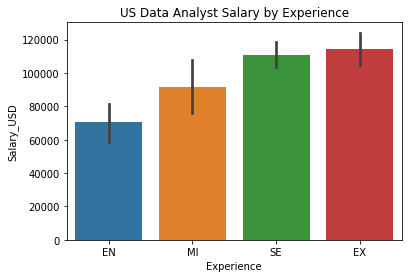

In [3]:
from matplotlib.pyplot import title


is_data_analyst = df["Designation"] == "Data Analyst" # Filter dataframe to only Data Analysts.
df_data_analyst = df[is_data_analyst]
is_US = df_data_analyst["Employee_Location"] == "US" # Filter dataframe to only US based
df_US_data_analyst = df_data_analyst[is_US]

sns.barplot(x=df_US_data_analyst["Experience"], y=df_US_data_analyst["Salary_USD"]).set(title= "US Data Analyst Salary by Experience"); # Plot bar graph salary by experience.
